In [52]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import mpmath as mp
import math

In [53]:
amsterdam = pd.read_csv('../amsterdam_subset.csv')
amsterdam

,Unnamed: 0,uuid,source,orig_id,city,city_ascii,city_id,city_lat,city_lon,country,iso2,iso3,admin_name,capital,population,continent
0,1905879,19c6e51e-fe64-4756-895d-7758889dbbd1,Mapillary,793569314897389,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe
1,1905880,580ce8e7-fbdb-45e6-971b-6d5b6523d0ef,Mapillary,500509417737025,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe
2,1905881,db31e5bc-5180-4320-b267-04ba3da0a980,Mapillary,299548784985576,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe
3,1905882,642298a7-563e-4650-b308-5e4371238b84,Mapillary,300520878202732,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe
4,1905883,32eeddbe-c4f0-4ac1-aff0-a0d19d258ae5,Mapillary,416737606538178,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26416,6957658,b6aedc00-101f-4b72-be67-e9e95c24c7f7,KartaView,1605310425,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe
26417,6957659,e1e6fbc2-a259-4ae1-b22d-15993c4f292c,KartaView,1605310441,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe
26418,6957660,2ced644b-aa2a-4df8-8ac6-b787ee6368ad,KartaView,1605310457,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe
26419,6957661,4961c187-3592-4a77-ac72-0f131d05fbdb,KartaView,1667748025,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,NLD,Noord-Holland,primary,862965.0,Europe


In [54]:
meta = pd.read_csv("../metadata_common_attributes.csv")[['uuid', 'lat', 'lon', 'datetime_local', 'sequence_index', 'sequence_id']]
meta.head()

/var/folders/6t/yn2bzknj4md_3s6cr6vl8h8c0000gn/T/ipykernel_18275/2268617963.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("../metadata_common_attributes.csv")[['uuid', 'lat', 'lon', 'datetime_local', 'sequence_index', 'sequence_id']]


,uuid,lat,lon,datetime_local,sequence_index,sequence_id
0,d3cca4a7-7994-47ff-9749-7df8ca7228e3,26.252018,127.713962,2021-11-03 16:01:23.605000+09:00,162,64fWKYwo1QbyUl0jZmuBOF
1,33f474ab-496e-41a7-86a6-08fad8fe6638,26.236920,127.707878,2021-09-18 11:44:28.690000+09:00,77,PEOixVS4MCXw9ZD7kd1uF2
2,0da8bf8d-bf34-4d94-aa51-2a7a3c880f6b,26.237406,127.721257,2021-11-03 10:33:46.609000+09:00,138,qc2h9ZIeNtUoDbBy6wdizl
3,23c0aa2e-573b-4a3f-a65b-fb8f7349725b,26.235019,127.725635,2021-09-18 10:49:02.615000+09:00,61,zH6VgUcYoibQ8907ytedxT
4,4f47ba8e-8437-4213-9721-8336b02ea703,26.242775,127.710308,2021-09-18 11:45:33.766000+09:00,142,PEOixVS4MCXw9ZD7kd1uF2


In [55]:
amsterdam = amsterdam.merge(meta, on='uuid', how='left')
amsterdam.head()

,Unnamed: 0,uuid,source,orig_id,city,city_ascii,city_id,city_lat,city_lon,country,...,iso3,admin_name,capital,population,continent,lat,lon,datetime_local,sequence_index,sequence_id
0,1905879,19c6e51e-fe64-4756-895d-7758889dbbd1,Mapillary,793569314897389,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,NLD,Noord-Holland,primary,862965.0,Europe,52.367188,4.893492,2020-09-20 12:43:12+02:00,418,3hrjjagox6vpm7dpkc4pvn
1,1905880,580ce8e7-fbdb-45e6-971b-6d5b6523d0ef,Mapillary,500509417737025,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,NLD,Noord-Holland,primary,862965.0,Europe,52.373929,4.884667,2020-09-21 18:50:13+02:00,221,m1te0g8ulchd3xyg5vfsxr
2,1905881,db31e5bc-5180-4320-b267-04ba3da0a980,Mapillary,299548784985576,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,NLD,Noord-Holland,primary,862965.0,Europe,52.366510,4.882237,2016-08-16 09:28:19.737000+02:00,447,zV2FWx5hM8B9KrdAjB-qBw
3,1905882,642298a7-563e-4650-b308-5e4371238b84,Mapillary,300520878202732,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,NLD,Noord-Holland,primary,862965.0,Europe,52.367038,4.890080,2017-03-02 17:26:02+01:00,62,wPdUPc8tjTjCQT2_vCPd6g
4,1905883,32eeddbe-c4f0-4ac1-aff0-a0d19d258ae5,Mapillary,416737606538178,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,NLD,Noord-Holland,primary,862965.0,Europe,52.369855,4.892274,2022-05-03 15:48:18.941000+02:00,140,kup6W2CiJAFmOfL7zM9vT8


In [56]:
df_contextual = pd.read_csv("../contextual.csv")
amsterdam = amsterdam.merge(df_contextual, on=["uuid", "source", "orig_id"])


/var/folders/6t/yn2bzknj4md_3s6cr6vl8h8c0000gn/T/ipykernel_18275/1981903582.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_contextual = pd.read_csv("../contextual.csv")


In [57]:
import osmnx as ox
pts = gp.GeoDataFrame(
    amsterdam, geometry=gp.points_from_xy(amsterdam.lon, amsterdam.lat), crs="EPSG:4326"
)
pts2 = ox.project_gdf(pts)

In [58]:
amsterdam_day = pts[pts["lighting_condition"] == "day"]
amsterdam_side = amsterdam_day[amsterdam_day["view_direction"] == "side"]
pts3 = ox.project_gdf(amsterdam_side)

In [59]:
segmentation = pd.read_csv('../segmentation.csv')
segmentation.head()

,uuid,source,orig_id,Bird,Ground-Animal,Curb,Fence,Guard-Rail,Barrier,Wall,...,On-Rails,Other-Vehicle,Trailer,Truck,Wheeled-Slow,Car-Mount,Ego-Vehicle,Total,green_view_index,sky_view_index
0,fab85b76-8fe7-433c-9109-dcd99a25a620,Mapillary,9.631169e+14,0.0,0.0,11012.0,63352.0,0.0,0.0,40556.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3049296.0,0.134794,0.261504
1,14da5502-276a-4b0e-ab1b-9969bef7cf3a,Mapillary,2.526096e+14,0.0,0.0,8244.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,816876.0,2310228.0,0.000000,0.000000
2,2fa06463-49f6-4d0c-8fdc-4ebf1754b996,Mapillary,9.966409e+14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3049192.0,0.000000,0.044677
3,9cf979a3-4e27-4935-b2cf-6dae1b883ecd,Mapillary,9.381521e+14,0.0,0.0,11544.0,128652.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3124480.0,0.485696,0.000000
4,7c7c7ad0-6449-4472-b8dc-ea9d35f4ee5f,Mapillary,9.689141e+14,0.0,0.0,276.0,26040.0,24608.0,185396.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20696.0,3039580.0,0.009376,0.634830


In [60]:
amsterdam_segmentation = amsterdam_day.merge(segmentation, on='uuid', how='left')
amsterdam_segmentation.Building.head()

0     219127.0
1     231984.0
2     392710.0
3    1248152.0
4     724364.0
Name: Building, dtype: float64

In [101]:
amsterdam_segmentation['building_fraction'] = amsterdam_segmentation.apply(lambda x: x['Building']/x['Total'], axis=1)
amsterdam_segmentation['wall_fraction'] = amsterdam_segmentation.apply(lambda x: x['Wall']/x['Total'], axis=1)
amsterdam_walls = amsterdam_segmentation[(amsterdam_segmentation["wall_fraction"] > 0.25) | (amsterdam_segmentation["building_fraction"] > 0.25)]
pts4 = ox.project_gdf(amsterdam_walls)
amsterdam_walls

,Unnamed: 0,uuid,source_x,orig_id_x,city,city_ascii,city_id,city_lat,city_lon,country,...,Trailer,Truck,Wheeled-Slow,Car-Mount,Ego-Vehicle,Total,green_view_index,sky_view_index,building_fraction,wall_fraction
3,1905882,642298a7-563e-4650-b308-5e4371238b84,Mapillary,300520878202732,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,0.0,0.0,3016736.0,0.000000,0.222460,0.413743,0.0
8,1905889,87e77845-fe9c-4f16-882a-322274a26898,Mapillary,121662616604750,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,0.0,0.0,3076972.0,0.014128,0.000000,0.541447,0.0
10,1905891,5df67923-2acd-42bb-b431-940e60dd0e15,Mapillary,773988880153982,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,0.0,0.0,2008262.0,0.086110,0.193348,0.319528,0.0
13,1905894,b653caea-99f1-4b4c-81c9-db5f2dfe6ff0,Mapillary,836793050253184,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,0.0,508922.0,1857465.0,0.021469,0.197721,0.389042,0.0
15,1905896,ec751a64-e3d1-4cf9-a812-6fcd1855722e,Mapillary,455418215520159,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,489671.0,0.0,1697669.0,0.033177,0.331485,0.305583,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25614,6957655,be893482-ac88-4995-a511-9e0f0ea597e4,KartaView,1605310393,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,0.0,0.0,9356453.0,0.030201,0.139888,0.250026,0.0
25615,6957656,7db309f6-b166-45eb-9de1-bb56a02cf0c6,KartaView,1605310409,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,0.0,0.0,9382853.0,0.000000,0.152144,0.254937,0.0
25617,6957658,b6aedc00-101f-4b72-be67-e9e95c24c7f7,KartaView,1605310425,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,0.0,0.0,9306695.0,0.000000,0.111144,0.263037,0.0
25620,6957661,4961c187-3592-4a77-ac72-0f131d05fbdb,KartaView,1667748025,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,...,0.0,0.0,0.0,0.0,0.0,4820918.0,0.004199,0.000000,0.399575,0.0


In [102]:
G = ox.graph_from_bbox(pts.total_bounds[3], pts.total_bounds[1], pts.total_bounds[2], pts.total_bounds[0], network_type='all_private', simplify=True, retain_all=True, truncate_by_edge=False)
G2 = ox.get_undirected(G)
df_G = ox.graph_to_gdfs(G2)
df_lines = df_G[1].copy()
df_lines_proj = ox.project_gdf(df_lines).reset_index().reset_index()

/var/folders/6t/yn2bzknj4md_3s6cr6vl8h8c0000gn/T/ipykernel_18275/3518030019.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(pts.total_bounds[3], pts.total_bounds[1], pts.total_bounds[2], pts.total_bounds[0], network_type='all_private', simplify=True, retain_all=True, truncate_by_edge=False)
/var/folders/6t/yn2bzknj4md_3s6cr6vl8h8c0000gn/T/ipykernel_18275/3518030019.py:1: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(pts.total_bounds[3], pts.total_bounds[1], pts.total_bounds[2], pts.total_bounds[0], network_type='all_private', simplify=True, retain_all=True, truncate_by_edge=False)
/Users/clairedonnelly/Documents/Urban-M4/streetscapes/.venv/lib/python3.10/site-packag

<Axes: >

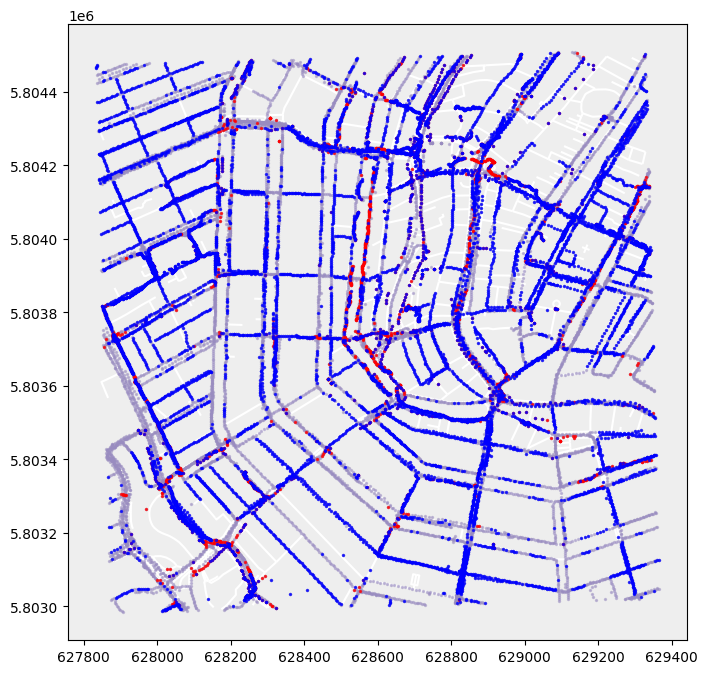

In [103]:
# create Matplotlib figure
fig, ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('#EEEEEE')

# plot place area on Axis ax
df_lines_proj.plot(ax=ax, color='white', zorder=5)

# plot points on Axis ax
pts2.plot(ax=ax, marker='o', color='#998cc0', markersize=2, alpha=0.5, zorder=10)

# plot sampled images on Axis ax
pts3.plot(ax=ax, marker='o', color='red', markersize=2, alpha=0.7, zorder=15)

# plot sampled images on Axis ax
pts4.plot(ax=ax, marker='o', color='blue', markersize=2, alpha=0.7, zorder=15)